<a href="https://colab.research.google.com/github/shehab0911/Custorm_Charn_Prediction_Using_ANN/blob/main/Imbalanced_Dataset_in_Deep_Learning_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [56]:
df=pd.read_csv('/content/gdrive/MyDrive/Machine_Learning/Deep_Learning/customer_churn.csv')

In [57]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [58]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5222,6854-EXGSF,Female,0,No,No,8,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),65.50,573.15,No
6116,7445-WMRBW,Female,0,No,No,48,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),73.85,3581.4,No
1693,7359-WWYJV,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),114.45,8375.05,No
700,1525-LNLOJ,Male,0,Yes,Yes,66,Yes,Yes,DSL,No,...,Yes,No,Yes,No,Two year,Yes,Bank transfer (automatic),63.30,4189.7,No
2665,8166-ORCHU,Male,1,Yes,No,33,Yes,No,Fiber optic,Yes,...,No,Yes,No,Yes,One year,Yes,Electronic check,93.55,3055.5,No


In [59]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [60]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [61]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [62]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [63]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [64]:
df.shape

(7043, 20)

In [65]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [66]:
df.iloc[488]['TotalCharges']

' '

In [67]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [68]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [69]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

<ipython-input-69-01816c9a1a9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [70]:
df1.TotalCharges.dtypes

dtype('float64')

In [71]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [72]:
df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

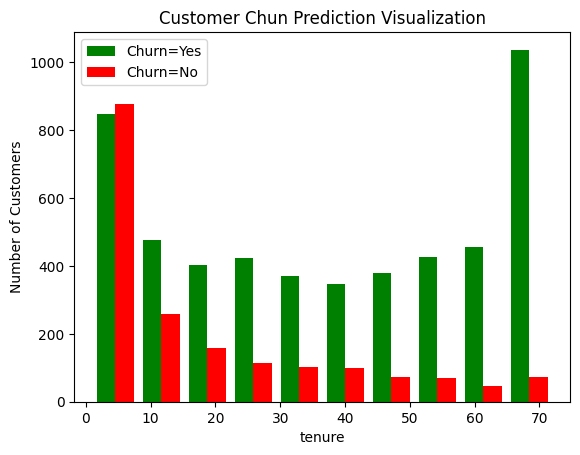

In [73]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Chun Prediction Visualization')

plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

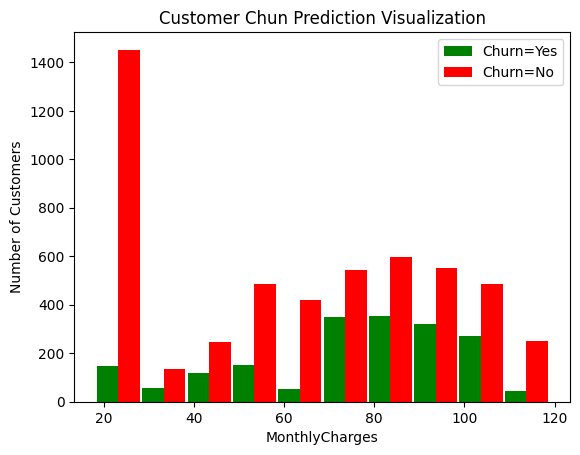

In [74]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title('Customer Chun Prediction Visualization')

plt.hist([mc_churn_yes,mc_churn_no],rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [75]:
for columns in df:
  print(columns)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [76]:
for columns in df:
  print(df[columns].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [77]:
for columns in df:
  print(f'{columns}:{df[columns].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889

In [78]:
def print_unique_col_values(df):
    for columns in df:
        if df[columns].dtypes=='object':
            print(f'{columns}:{df[columns].unique()}')

In [79]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [80]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-80-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-80-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [81]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [82]:
for columns in df:
  print(columns)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [83]:
yes_no_column=['Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_column:
  df1[col].replace({'Yes':1,'No':0},inplace=True)


<ipython-input-83-42ceb744abba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [84]:
for col in df1:
  print(f'{col}:{df1[col].unique()}')


gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [85]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-85-ba153b6b6960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [86]:
df1['gender'].unique()

array([1, 0])

In [87]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [88]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3982,0,0,0,1,71,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2233,0,0,0,0,54,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
468,1,0,0,1,44,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3517,0,0,1,0,70,1,0,1,1,1,...,0,0,1,0,1,0,1,0,0,0


In [89]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [90]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [91]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6002,0,0,1,0,0.070423,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
986,1,0,0,0,0.154930,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1948,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [92]:
for col in df2:
  print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [93]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [95]:
x_train.shape

(5625, 26)

In [96]:
x_test.shape

(1407, 26)

In [97]:
x_test[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2660,0,0,0,1,0.169014,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
744,1,0,0,0,0.056338,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5579,1,0,1,1,0.971831,1,1,1,1,1,...,0,0,1,0,0,1,1,0,0,0
64,1,0,0,0,0.112676,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3287,0,0,1,1,0.253521,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
816,1,0,0,0,0.014085,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
2670,1,0,1,1,0.704225,1,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
5920,1,1,0,0,0.352113,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1023,1,1,1,0,0.619718,1,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
6087,0,0,0,1,0.352113,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0


In [98]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [99]:
len(x_train.columns)

26

In [100]:
from keras.engine.training import optimizer
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5237 - accuracy: 0.7417
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.7998
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8014
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8071
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8071
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8076
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4084 - accuracy: 0.8091
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4070 - accuracy: 0.8073
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.8092
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4048 - accura

In [101]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.7868


[0.44918492436408997, 0.7867803573608398]

In [102]:
yp=model.predict(x_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.16077596],
       [0.6049647 ],
       [0.02124315],
       [0.77167267],
       [0.53568065]], dtype=float32)

In [103]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [104]:
y_pred=[]
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [105]:
y_pred[:5]

[0, 1, 0, 1, 1]

In [106]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       999
           1       0.68      0.51      0.58       408

    accuracy                           0.79      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

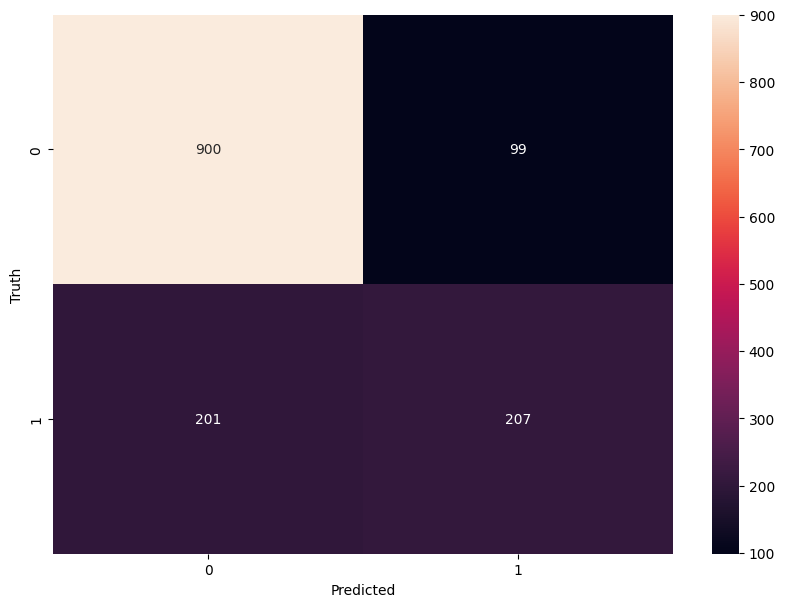

In [107]:
import seaborn as sn
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
!pip install tensorflow-addons==0.16.1


#**Imbalance Dataset Handle**

In [110]:
from tensorflow_addons import losses

In [111]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [112]:
def ANN(X_train,y_train,x_test,y_test,loss,weights):
  model= keras.Sequential([
      keras.layers.Dense(26,input_dim=26,activation='relu'),
      keras.layers.Dense(15,activation='relu'),
      keras.layers.Dense(1,activation='sigmoid')

  ])
  model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])

  if weights==-1:
    model.fit(x_train,y_train,epochs=100)
  else:
    model.fit(x_train,y_train,epochs=100,class_weight=weights)

  print(model.evaluate(x_test,y_test))

  y_pred=model.predict(x_test)
  y_pred=np.round(y_pred)

  print('classification_reports :', classification_report(y_test,y_pred))

  return y_pred


In [113]:
y_pred = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.4981 - accuracy: 0.7643
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4289 - accuracy: 0.7927
Epoch 3/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4210 - accuracy: 0.8012
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4165 - accuracy: 0.8027
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4131 - accuracy: 0.8057
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4118 - accuracy: 0.8071
Epoch 7/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4088 - accuracy: 0.8053
Epoch 8/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4067 - accuracy: 0.8078
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4059 - accuracy: 0.8087
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4047 - accura

#UnderSampling

In [114]:
 count_class_0,count_class_1=df1.Churn.value_counts()

 df_class_0 = df2[df2['Churn']==0]
 df_class_1 = df2[df2['Churn']==1]

In [115]:
count_class_0,count_class_1

(5163, 1869)

In [116]:
df_class_0.shape

(5163, 27)

In [117]:
df_class_1.shape

(1869, 27)

In [118]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
print('random under sampling :')
print(df_test_under.Churn.value_counts())

random under sampling :
0    1869
1    1869
Name: Churn, dtype: int64


In [119]:
x=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [121]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [122]:
y_pred = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 3ms/step - loss: 0.6577 - accuracy: 0.6271
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.7575
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7676
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7689
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7672
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7753
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.7759
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7779
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.7813
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7796
Epoch 11/

#Method 2 OverSampling

In [123]:
count_class_0,count_class_1

(5163, 1869)

In [124]:
df_class_0.shape

(5163, 27)

In [127]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)
print('Random over sampling :')
print(df_test_over.Churn.value_counts())


Random over sampling :
0    5163
1    5163
Name: Churn, dtype: int64


In [126]:
df_test_over.shape

(10326, 27)

In [154]:
x=df_test_over.drop('Churn',axis='columns')
y=df_test_over['Churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [155]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [145]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [131]:
y_pred = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 4ms/step - loss: 0.5383 - accuracy: 0.7345
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4896 - accuracy: 0.7608
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4846 - accuracy: 0.7621
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4812 - accuracy: 0.7646
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4781 - accuracy: 0.7684
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4744 - accuracy: 0.7699
Epoch 7/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4715 - accuracy: 0.7712
Epoch 8/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4698 - accuracy: 0.7730
Epoch 9/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4672 - accuracy: 0.7751
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4648 - accura

#**Method 3 SMOTE**

In [132]:
pip install imbalanced-learn

In [175]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [176]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)

In [177]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y_sm)

ValueError: ignored

In [179]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [180]:
y_test.value_counts()

0    1033
1     374
Name: Churn, dtype: int64

In [181]:
y_pred = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 0.7189
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4300 - accuracy: 0.7915
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4217 - accuracy: 0.7991
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4177 - accuracy: 0.8030
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4152 - accuracy: 0.8020
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4130 - accuracy: 0.8052
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8084
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8091
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4068 - accura

#**Method 4 : Use of Ensamble with undersampling**

In [182]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [184]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [186]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [187]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [189]:
df3=x_train.copy()
df3['Churn']=y_train

In [190]:
df3_class0=df3[df3.Churn==0]
df3_class1=df3[df3.Churn==1]

In [191]:
df3_class0.shape,df3_class1.shape

((4130, 27), (1495, 27))

In [192]:
df_train=pd.concat([df3_class0[:1495],df3_class1],axis=0)
df_train.shape

(2990, 27)

In [193]:
def get_train_batch(df_majority,df_minority,start,end):
  df_train =pd.concat([df_majority[start:end],df_minority],axis=0)

  x_train=df_train.drop('Churn',axis='columns')
  y_train=df_train.Churn

  return x_train,y_train

In [199]:
x_train,y_train=get_train_batch(df3_class0,df3_class1,0,1495)

y_pred1 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.6517 - accuracy: 0.6415
Epoch 2/100
94/94 [==============================] - 1s 5ms/step - loss: 0.5137 - accuracy: 0.7592
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4939 - accuracy: 0.7642
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4875 - accuracy: 0.7676
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4830 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4790 - accuracy: 0.7716
Epoch 7/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4784 - accuracy: 0.7702
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4761 - accuracy: 0.7726
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4760 - accuracy: 0.7709
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4738 - accuracy: 0.7676
Epoch 11/

In [200]:
x_train,y_train=get_train_batch(df3_class0,df3_class1,1495,2990)

y_pred2 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6224 - accuracy: 0.6508
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5145 - accuracy: 0.7532
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4935 - accuracy: 0.7642
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.7629
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4823 - accuracy: 0.7642
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.7639
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.7686
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.7722
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4714 - accuracy: 0.7709
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.7726
Epoch 11/

In [201]:
x_train,y_train=get_train_batch(df3_class0,df3_class1,2990,4130)

y_pred3 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6748 - accuracy: 0.5909
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7526
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.7651
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7700
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7712
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7677
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7723
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7848
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7765
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7818
Epoch 11/

In [202]:
len(y_pred1)

1407

In [203]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]
  if n_ones>1:
    y_pred_final[i]=1
  else:
    y_pred_final[i]=0


In [204]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1033
           1       0.47      0.81      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.72      1407

